In [ ]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/gdataset'

can  glass  paper  striform


In [ ]:
import os

train_dir = os.path.join('/content/drive/MyDrive/gdataset')

#test_dir = 'test'
labels = ['glass', 'paper', 'can', 'striform']

In [ ]:
# 이미지 갯수 확인
for label in labels:
    # 경로 + 이름(glass, paper, can, striform)
    directory = os.path.join(train_dir, label)
    # 갯수(len) 출력
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "glass":	 1000
Images of label "paper":	 1231
Images of label "can":	 1000
Images of label "striform":	 1000


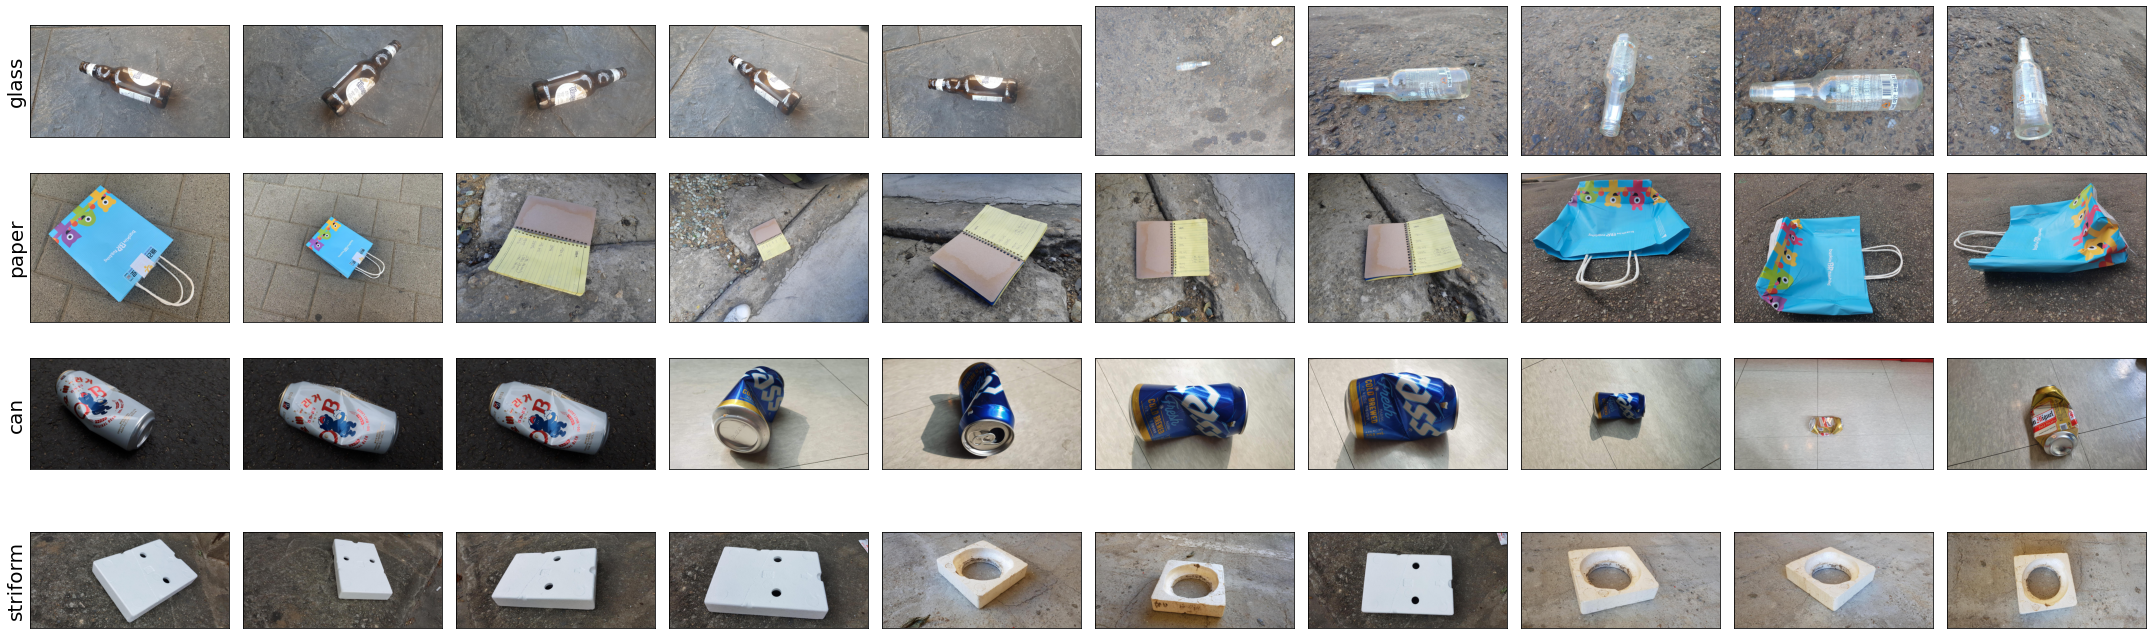

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 사이즈 설정 가로13, 세로14
plt.figure(figsize=(30,14))

# 총 4개 범위(ragne4)
for i in range(4):
    directory = os.path.join(train_dir, labels[i])
    # 10개 이미지만 출력
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)

# 이미지 plt 출력        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (256, 256, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (256, 256),
                  batch_size = 20,
                  class_mode = 'categorical',subset='training')

valid_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (256, 256),
                  batch_size = 20,
                  class_mode = 'categorical',
                  subset='validation')

Found 3385 images belonging to 4 classes.
Found 846 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))



In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 23,104,580
Trainable params: 23,104,580
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 모델 체크포인트 생성

checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       epochs =20,
                       callbacks=[checkpoint],
                       validation_data = valid_generator)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 1/10
170/170 [==============================] - 1222s 7s/step - loss: 0.7770 - accuracy: 0.6606 - val_loss: 0.5715 - val_accuracy: 0.7577
Epoch 2/10
170/170 [==============================] - 242s 1s/step - loss: 0.2285 - accuracy: 0.9149 - val_loss: 0.4736 - val_accuracy: 0.8227
Epoch 3/10
170/170 [==============================] - 242s 1s/step - loss: 0.1246 - accuracy: 0.9548 - val_loss: 0.4212 - val_accuracy: 0.8582
Epoch 4/10
170/170 [==============================] - 242s 1s/step - loss: 0.0722 - accuracy: 0.9755 - val_loss: 0.3847 - val_accuracy: 0.8582
Epoch 5/10
170/170 [==============================] - 239s 1s/step - loss: 0.0417 - accuracy: 0.9849 - val_loss: 0.4017 - val_accuracy: 0.8723
Epoch 6/10
170/170 [==============================] - 239s 1s/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.4284 - val_accuracy: 0.8712
Epoch 7/10
170/170 [==============================] - 239s 1s/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.3634 - val_accuracy: 0.884

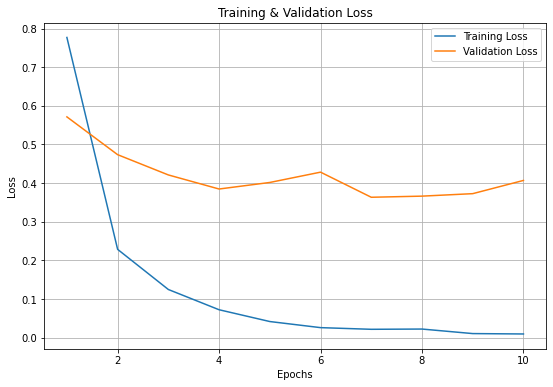

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

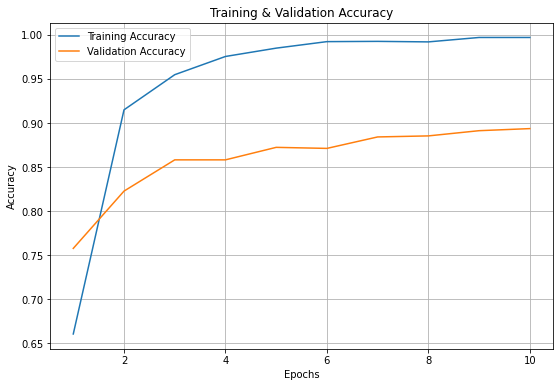

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

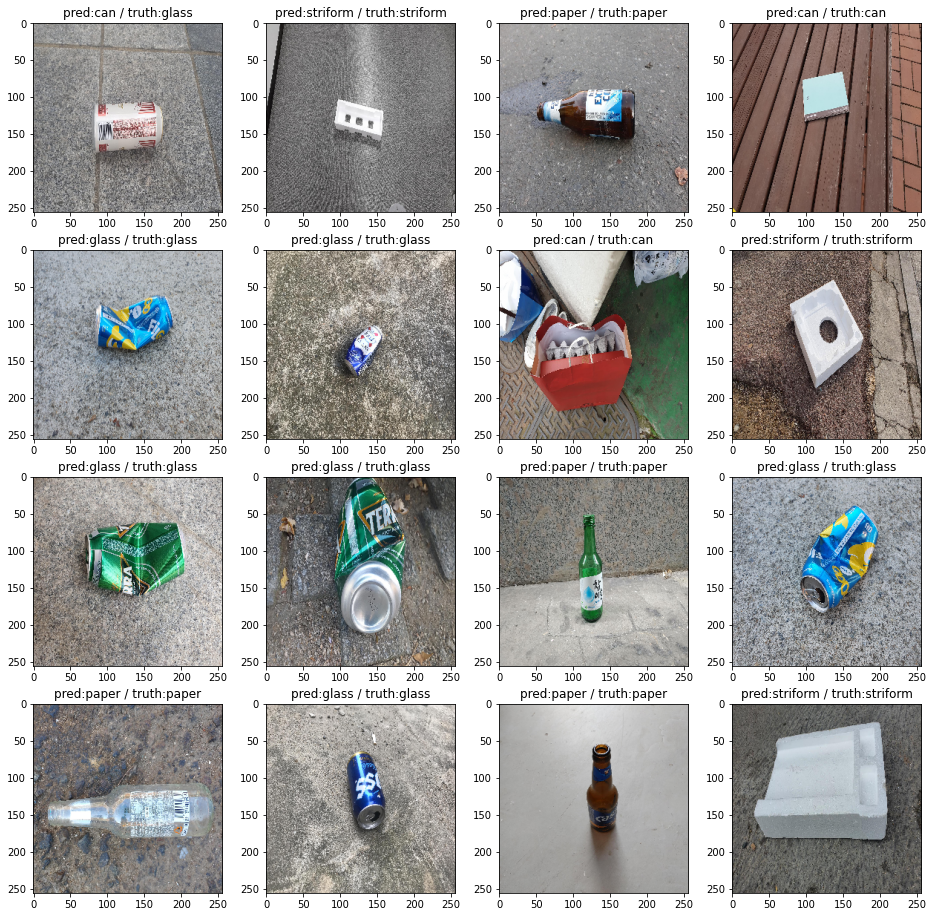

In [ ]:
import numpy as np

test_x, test_y = valid_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])


In [ ]:
loss, accuracy = model.evaluate(valid_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

 1/50 [..............................] - ETA: 55s - loss: 0.7785 - accuracy: 0.9000

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


50/50 [==============================] - 47s 930ms/step - loss: 0.0929 - accuracy: 0.9770
Loss = 0.09290
Accuracy = 0.97700


In [ ]:
model.save("/content/drive/My Drive/vgg/byun.h5")